- Task: To predict whether it will rain tomorrow in a specific location given its weather information 

- Model: Logistic Regression (Binary classification)
- Data: Austraila Rain data-Kaggle


In [ ]:
# Importing modules and packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [ ]:
# fetching data from csv and converting to a dataframe

data_path = '/content/drive/MyDrive/Colab Notebooks/Machine learning/dataset/weatherAUS.csv'
df = pd.read_csv(data_path)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

**Basic overview of data:-**

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.shape

(145460, 23)

In [ ]:
# dropping the rows for which raintoday and raintomorrow is empty

df = df.dropna(subset = ['RainToday','RainTomorrow'])

In [ ]:
df.shape

(140787, 23)

**EDA on different columns:-**

In [ ]:
# Location

loc = df['Location'].nunique()
loc

49

In [ ]:
fig = px.histogram(df,x='Location',color='RainToday',width=800, height=400)
fig.show()

Observation:- Overall a uniform distribution of data along different locations except few.Location plays an important role on raintomorrow.

In [ ]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Himidity

px.histogram(df,x='Humidity3pm',color='RainTomorrow',width=600, height=400)

Observation:- The above figure shows if today the humidity at 3pm is high it is more likely to rain tomorrow.So Humidity_3pm seems to be an important feature to decide tomorrow's rain possibility.

In [ ]:
# Temperature

px.histogram(df,x='MaxTemp',color='RainTomorrow',width=600, height=400)

In [ ]:
# Raintoday

px.histogram(df,x='RainToday',color='RainTomorrow',width=600, height=400)

Observation:- A classic example of class imbalancing as no. of days it did not rain is much higher than no. of days it rained tomorrow.
It is more likely to not rain tomorrow if does not rain today.But if it rains today it is uncertain that it will rain tomorrow or not.

In [ ]:
px.scatter(df.sample(3000),x='Humidity3pm',y='Temp3pm',width=600, height=400,color='RainTomorrow')

Observation:- most yes data points are at high humidity and low temperature region.So rain tomorrow is more likely there.

**Preprocessing:-**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df,test_df = train_test_split(df,test_size=.2,random_state=42)
train_df,val_df = train_test_split(train_val_df,test_size=.25,random_state=42)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(84471, 23)
(28158, 23)
(28158, 23)


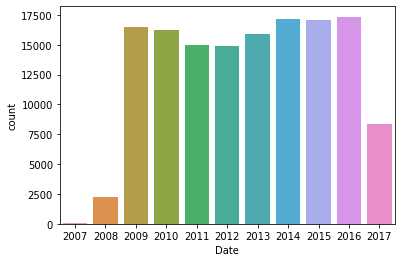

In [ ]:
# Counting no of rows per year

sns.countplot(data=df,x=pd.to_datetime(df.Date).dt.year)
plt.show( )

It is important to train the model on past data and test on future data to avoid biased training.

In [ ]:
# devide the data into train val and tes based on year

x_train = df[pd.to_datetime(df.Date).dt.year<2015]
x_val = df[pd.to_datetime(df.Date).dt.year==2015]
x_test = df[pd.to_datetime(df.Date).dt.year>2015]

In [ ]:
print(x_train.shape,x_val.shape,x_test.shape)

(97988, 23) (17089, 23) (25710, 23)


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# eliminating Date and target(raintomorrow)column

train_input = x_train.iloc[:,1:-1]
train_input.head(2)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   

   WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  Humidity9am  \
0           44.0          W        WNW  ...          24.0         71.0   
1           44.0        NNW        WSW  ...          22.0         44.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   
1         25.0       1010.6       1007.8       NaN       NaN     17.2   

   Temp3pm  RainToday  
0     21.8         No  
1     24.3         No  

[2 rows x 21 columns]

In [ ]:
# creating targets for train val and test

train_target = x_train['RainTomorrow']

In [ ]:
print(train_input.shape,train_target.shape)

(97988, 21) (97988,)


In [ ]:
val_input = x_val.iloc[:,1:-1]
val_target = x_val['RainTomorrow']
print(val_input.shape,val_target.shape)

(17089, 21) (17089,)


In [ ]:
test_input = x_test.iloc[:,1:-1]
test_target = x_test['RainTomorrow']
print(test_input.shape,test_target.shape)

(25710, 21) (25710,)


In [ ]:
import numpy as np

In [ ]:
# seperating numerical and categorical columns for better processing

numeric_col = train_input.select_dtypes(include=np.number).columns.tolist()
categorical_col = train_input.select_dtypes('object').columns.tolist()
categorical_col
numeric_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
train_input[numeric_col].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [ ]:
train_input[categorical_col].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [ ]:
train_input[numeric_col].isnull().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [ ]:
# Null value imputation by mean for numeric columns

train_input[numeric_col] = train_input[numeric_col].fillna(train_input[numeric_col].mean())
val_input[numeric_col] = val_input[numeric_col].fillna(val_input[numeric_col].mean())
test_input[numeric_col] = test_input[numeric_col].fillna(test_input[numeric_col].mean())

In [ ]:
train_input[numeric_col].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.336997      6.977729      8.518819      3.134884      2.913479   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      3.800000      7.500000   
50%       11.800000     22.400000      0.000000      5.289991      7.609004   
75%       16.600000     27.900000      0.800000      5.600000      9.200000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.212094      8.944046      8.823868     18.900812     20.637576   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     69.000000     52.000000   
75%        46.000000     19.000000     24.000000     83.000000     65.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        6.735644      6.663087      2.298554      2.141830      6.385800   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1013.400000   1010.900000      3.000000      3.000000     12.200000   
50%     1017.513734   1015.132352      4.302952      4.410677     16.600000   
75%     1021.800000   1019.300000      6.000000      6.000000     21.300000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97988.000000  
mean      21.540138  
std        6.810804  
min       -5.100000  
25%       16.600000  
50%       21.000000  
75%       26.100000  
max       46.100000

In [ ]:
# Scaling the numeric columns to 0 and 1

from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_input[numeric_col])

MinMaxScaler()

In [ ]:
print(list(scaler.data_max_))
print(list(scaler.data_min_))

[33.9, 48.1, 371.0, 82.4, 14.3, 135.0, 87.0, 87.0, 100.0, 100.0, 1041.0, 1039.6, 9.0, 9.0, 40.2, 46.1]
[-8.5, -4.1, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 980.5, 979.0, 0.0, 0.0, -5.9, -5.1]


In [ ]:
train_input[numeric_col] = scaler.transform(train_input[numeric_col])
val_input[numeric_col] = scaler.transform(val_input[numeric_col])
test_input[numeric_col] = scaler.transform(test_input[numeric_col])

In [ ]:
train_input[numeric_col].describe()


MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483675      0.519582      0.006396      0.064199      0.532098   
std        0.149457      0.133673      0.022962      0.038045      0.203740   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.377358      0.421456      0.000000      0.046117      0.524476   
50%        0.478774      0.507663      0.000000      0.064199      0.532098   
75%        0.591981      0.613027      0.002156      0.067961      0.643357   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265239      0.161980      0.215685      0.686287      0.514695   
std         0.102419      0.102805      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.080460      0.149425      0.570000      0.370000   
50%         0.255814      0.149425      0.218391      0.690000      0.520000   
75%         0.310078      0.218391      0.275862      0.830000      0.650000   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.611797      0.596243      0.478106      0.490075      0.493170   
std        0.111333      0.109952      0.255395      0.237981      0.138521   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.543802      0.526403      0.333333      0.333333      0.392625   
50%        0.611797      0.596243      0.478106      0.490075      0.488069   
75%        0.682645      0.665017      0.666667      0.666667      0.590022   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.520315  
std        0.133024  
min        0.000000  
25%        0.423828  
50%        0.509766  
75%        0.609375  
max        1.000000

In [ ]:
categorical_col

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
# Converting categorical column to one hot encoded numeric column

from sklearn.preprocessing import OneHotEncoder

In [ ]:
train_input[categorical_col]

Location WindGustDir WindDir9am WindDir3pm RainToday
0        Albury           W          W        WNW        No
1        Albury         WNW        NNW        WSW        No
2        Albury         WSW          W        WSW        No
3        Albury          NE         SE          E        No
4        Albury           W        ENE         NW        No
...         ...         ...        ...        ...       ...
144548    Uluru         SSE        ESE        SSE        No
144549    Uluru          NE        ENE         SW        No
144550    Uluru         ESE        ESE        SSE        No
144551    Uluru         ESE        ESE        SSW        No
144552    Uluru         WNW        ENE        SSW        No

[97988 rows x 5 columns]

In [ ]:
ohe = OneHotEncoder()
ohe.fit(train_input[categorical_col])

OneHotEncoder()

In [ ]:
encoded_col = list(ohe.get_feature_names_out(categorical_col))
encoded_col

In [ ]:
train_input[encoded_col] = ohe.transform(train_input[categorical_col]).toarray()
val_input[encoded_col] = ohe.transform(val_input[categorical_col]).toarray()
test_input[encoded_col] = ohe.transform(test_input[categorical_col]).toarray()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented 

In [ ]:
train_input.head(2)

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury  0.516509  0.517241  0.001617     0.064199  0.532098           W   
1   Albury  0.375000  0.559387  0.000000     0.064199  0.532098         WNW   

   WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  WindDir3pm_SSE  \
0       0.294574          W        WNW  ...            0.0             0.0   
1       0.294574        NNW        WSW  ...            0.0             0.0   

   WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
0             0.0            0.0           0.0             1.0   
1             0.0            0.0           0.0             0.0   

   WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0           1.0            0.0  
1             1.0             0.0           1.0            0.0  

[2 rows x 123 columns]

In [ ]:
# printing final data shape

print(train_input.shape,train_target.shape)
print(val_input.shape,val_target.shape)
print(test_input.shape,test_target.shape)

(97988, 123) (97988,)
(17089, 123) (17089,)
(25710, 123) (25710,)


In [ ]:
train_input.to_parquet('train_file.parquet')
val_input.to_parquet('val_file.parquet')
test_input.to_parquet('test_file.parquet')

In [ ]:
pd.DataFrame(train_target).to_parquet('train_file_target.parquet')
pd.DataFrame(val_target).to_parquet('val_file_target.parquet')
pd.DataFrame(test_target).to_parquet('test_file_target.parquet')

In [ ]:
train_x = pd.read_parquet('/content/train_file.parquet')
val_x = pd.read_parquet('/content/val_file.parquet')
test_x = pd.read_parquet('/content/test_file.parquet')
train_y = pd.read_parquet('/content/train_file_target.parquet')
val_y = pd.read_parquet('/content/val_file_target.parquet')
test_y = pd.read_parquet('/content/test_file_target.parquet')

In [ ]:
print(train_x.shape,train_y.shape)
print(val_x.shape,val_y.shape)
print(test_x.shape,test_y.shape)

(97988, 123) (97988, 1)
(17089, 123) (17089, 1)
(25710, 123) (25710, 1)


**Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
train_y

In [ ]:
# taking only numeric and encoded columns for training and testing

x = train_x[numeric_col+encoded_col]
y = train_y.iloc[:,0]

In [ ]:
model.fit(x,y)

LogisticRegression(solver='liblinear')

In [ ]:
model.coef_

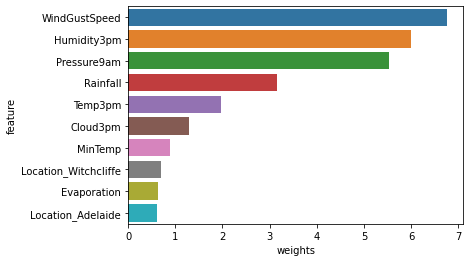

In [ ]:
df_feature_wt = pd.DataFrame({'feature' : numeric_col+encoded_col,
              'weights' : model.coef_[0] })
sns.barplot(data=df_feature_wt.sort_values('weights',ascending=False).head(10),x='weights',y='feature')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# accuracy score of the model

def acc_cm_fun(x,y_true,model):
  y_pred = model.predict(x)
  accuracy = accuracy_score(y_pred,y_true)
  cm = confusion_matrix(y_true, y_pred,normalize='true')
  plt.figure(figsize=(8,5))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
  plt.xlabel('predicted value')
  plt.ylabel('True value')
  plt.show()
  return accuracy

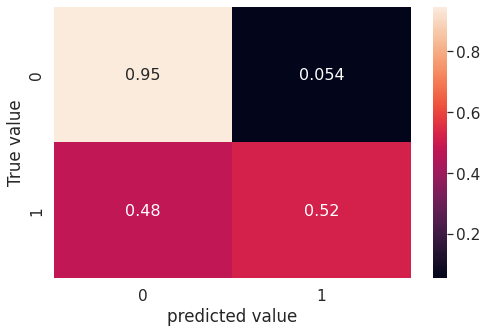

training accuracy score: 0.8520022859942034


In [ ]:
print('training accuracy score:',acc_cm_fun(x,y,model))

In [ ]:
x_val = val_x[numeric_col+encoded_col]
y_val = val_y.iloc[:,0]

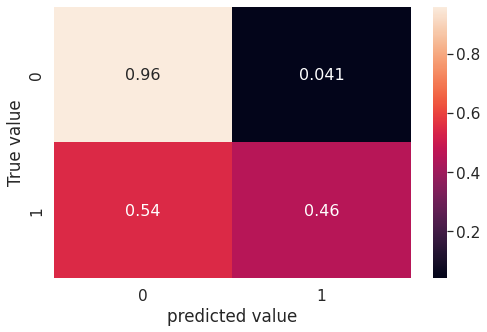

validation accuracy score: 0.8538240973725788


In [ ]:
print('validation accuracy score:',acc_cm_fun(x_val,y_val,model))

In [ ]:
x_test = test_x[numeric_col+encoded_col]
y_test = test_y.iloc[:,0]

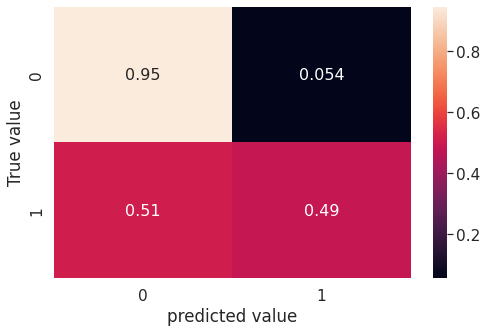

Test accuracy score: 0.8419292104239595


In [ ]:
print('Test accuracy score:',acc_cm_fun(x_test,y_test,model))

In [ ]:
# predicting model's performance on a new instance

def rainfall_predictor(input):
  df_new = pd.DataFrame([new_input])
  df_new_1 = df_new.iloc[:,1:]
  df_new_1[numeric_col] = df_new_1[numeric_col].fillna(x_train[numeric_col].mean())
  df_new_1[numeric_col] = scaler.transform(df_new_1[numeric_col])
  df_new_1[encoded_col] = ohe.transform(df_new_1[categorical_col]).toarray()
  x_new = df_new_1[numeric_col+encoded_col]
  prediction = model.predict(x_new)[0]
  prob = model.predict_proba(x_new)[0][list(model.classes_).index(prediction)]
  return prediction,prob






In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.NaN,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 22.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [ ]:
rainfall_predictor(new_input)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



('No', 0.8171571866796757)